In [4]:
pip install bs4

In [5]:
import requests

In [6]:
from bs4 import BeautifulSoup

In [7]:
import requests

url = "https://books.toscrape.com"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

print(response.status_code)


200


In [8]:
books_data = []

In [9]:
print(response.text[:1000])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    All products | Books to Scrape - Sandbox
</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
        <meta name="created" content="24th Jun 2016 09:29" />
        <meta name="description" content="" />
        <meta name="viewport" content="width=device-width" />
        <meta name="robots" content="NOARCHIVE,NOCACHE" />

        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
        <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->

        
            <link rel="shortcut icon" href="static/oscar/favicon.

In [10]:
soup = BeautifulSoup(response.text, "html.parser")

In [11]:
print(soup.title)

<title>
    All products | Books to Scrape - Sandbox
</title>


In [12]:
print(soup.title.text)


    All products | Books to Scrape - Sandbox



In [13]:
#we ask the python how many books on the page
books = soup.find_all("article", class_="product_pod")
print(len(books))

20


In [14]:
first_book = books[0] #first book

In [15]:
title = first_book.h3.a["title"] #book title
print(title)

A Light in the Attic


In [16]:
price = first_book.find("p", class_="price_color").text #book price
print(price)

Â£51.77


In [17]:
rating = first_book.find("p", class_="star-rating")["class"][1] #book rating
print(rating)

Three


In [18]:
availability = first_book.find("p", class_="instock availability").text.strip()
print(availability)

In stock


In [19]:
print(len(books))

20


In [20]:
#single book code in single line 
for book in books:
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text
    rating = book.find("p", class_="star-rating")["class"][1]
    availability = book.find("p", class_="instock availability").text.strip()

    books_data.append([title, price, rating, availability])

In [21]:
len(books_data)

20

In [22]:
books_data[:2]

[['A Light in the Attic', 'Â£51.77', 'Three', 'In stock'],
 ['Tipping the Velvet', 'Â£53.74', 'One', 'In stock']]

In [23]:
books_data = []

for page in range(1, 21):   # 1 to 20 pages
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    books = soup.find_all("article", class_="product_pod")
    print(f"Page {page} → Books found: {len(books)}")

    for book in books:
        title = book.h3.a["title"]
        price_text = book.find("p", class_="price_color").text
        price = float(price_text.replace("£", "").replace("Â", "")) #this is error hapining
        rating = book.find("p", class_="star-rating")["class"][1]
        availability = book.find("p", class_="instock availability").text.strip()
        book_url = book.h3.a["href"]

        books_data.append([
            title,
            float(price),
            rating,
            availability,
            page,
            book_url
        ])


Page 1 → Books found: 20
Page 2 → Books found: 20
Page 3 → Books found: 20
Page 4 → Books found: 20
Page 5 → Books found: 20
Page 6 → Books found: 20
Page 7 → Books found: 20
Page 8 → Books found: 20
Page 9 → Books found: 20
Page 10 → Books found: 20
Page 11 → Books found: 20
Page 12 → Books found: 20
Page 13 → Books found: 20
Page 14 → Books found: 20
Page 15 → Books found: 20
Page 16 → Books found: 20
Page 17 → Books found: 20
Page 18 → Books found: 20
Page 19 → Books found: 20
Page 20 → Books found: 20


In [24]:
len(books_data)

400

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(
    books_data,
    columns=[
        "title",
        "price_gbp",
        "rating_text",
        "availability_text",
        "page_number",
        "book_url"
    ]
)

In [27]:
df.shape

(400, 6)

In [28]:
df.head()

,title,price_gbp,rating_text,availability_text,page_number,book_url
0,A Light in the Attic,51.77,Three,In stock,1,a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,53.74,One,In stock,1,tipping-the-velvet_999/index.html
2,Soumission,50.10,One,In stock,1,soumission_998/index.html
3,Sharp Objects,47.82,Four,In stock,1,sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock,1,sapiens-a-brief-history-of-humankind_996/index...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              400 non-null    object 
 1   price_gbp          400 non-null    float64
 2   rating_text        400 non-null    object 
 3   availability_text  400 non-null    object 
 4   page_number        400 non-null    int64  
 5   book_url           400 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 18.9+ KB


In [30]:
#we want 8-columns so we add 2 in very smart way but first rating 
#column was one,two,three value we convert it onto the 1,2,3- values
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

df["rating_numeric"] = df["rating_text"].map(rating_map)

In [31]:
#we add one column with REF of "availability_text" -Yes=In stock,No=Not in stock
df["is_in_stock"] = df["availability_text"].apply(
    lambda x: "Yes" if "In stock" in x else "No"
)

In [32]:
df.shape #here is we have 8-columns now

(400, 8)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              400 non-null    object 
 1   price_gbp          400 non-null    float64
 2   rating_text        400 non-null    object 
 3   availability_text  400 non-null    object 
 4   page_number        400 non-null    int64  
 5   book_url           400 non-null    object 
 6   rating_numeric     400 non-null    int64  
 7   is_in_stock        400 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 25.1+ KB


In [34]:
df["page_number"].value_counts().sort_index()

page_number
1     20
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12    20
13    20
14    20
15    20
16    20
17    20
18    20
19    20
20    20
Name: count, dtype: int64

In [35]:
df.columns

Index(['title', 'price_gbp', 'rating_text', 'availability_text', 'page_number',
       'book_url', 'rating_numeric', 'is_in_stock'],
      dtype='object')

In [36]:
df.isnull().sum()

title                0
price_gbp            0
rating_text          0
availability_text    0
page_number          0
book_url             0
rating_numeric       0
is_in_stock          0
dtype: int64

In [37]:
df.duplicated().sum() #if found used this df = df.drop_duplicates()

np.int64(0)

In [38]:
df['price_gbp'].describe()

count    400.00000
mean      34.95980
std       14.52635
min       10.16000
25%       21.93000
50%       36.80500
75%       47.68250
max       59.90000
Name: price_gbp, dtype: float64

In [39]:
df['rating_numeric'].value_counts().sort_index()

rating_numeric
1    88
2    82
3    80
4    73
5    77
Name: count, dtype: int64

In [40]:
df['page_number'].value_counts().sort_index()

page_number
1     20
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12    20
13    20
14    20
15    20
16    20
17    20
18    20
19    20
20    20
Name: count, dtype: int64

In [41]:
print(df.shape)
df.isna().sum()

(400, 8)


title                0
price_gbp            0
rating_text          0
availability_text    0
page_number          0
book_url             0
rating_numeric       0
is_in_stock          0
dtype: int64

### Lets Start EDA Q&A

In [42]:
#1.What is the overall price distribution of books?(most books cheap or expensive-price spred)

In [43]:
df['price_gbp'].describe() #1st way # insights = mean → average price
                                    # min / max → price range

count    400.00000
mean      34.95980
std       14.52635
min       10.16000
25%       21.93000
50%       36.80500
75%       47.68250
max       59.90000
Name: price_gbp, dtype: float64

In [44]:
avg_price = df['price_gbp'].mean() #2nd way
avg_price

np.float64(34.9598)

In [45]:
#2.Which rating is most common?

In [46]:
df['rating_numeric'].value_counts().sort_index()

rating_numeric
1    88
2    82
3    80
4    73
5    77
Name: count, dtype: int64

In [47]:
print(df['rating_numeric'].value_counts().sort_index())
df.groupby('rating_numeric')['price_gbp'].mean() # insights= Most books are rated 3–4 stars.

rating_numeric
1    88
2    82
3    80
4    73
5    77
Name: count, dtype: int64


rating_numeric
1    35.502045
2    33.605488
3    34.727625
4    36.652603
5    34.418701
Name: price_gbp, dtype: float64

In [48]:
#3.Do higher-rated books cost more

In [49]:
df.groupby('rating_numeric')['price_gbp'].mean() # insights= Compare average price by rating
                                                 # Look for upward / flat trend

rating_numeric
1    35.502045
2    33.605488
3    34.727625
4    36.652603
5    34.418701
Name: price_gbp, dtype: float64

In [50]:
#4.Are books evenly distributed across pages

In [51]:
df['page_number'].value_counts().sort_index() # insights= Exactly 20 books per page → no missing data.

page_number
1     20
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12    20
13    20
14    20
15    20
16    20
17    20
18    20
19    20
20    20
Name: count, dtype: int64

In [52]:
#5.How many books are in stock

In [53]:
df['is_in_stock'].value_counts() # insights= Nearly all books are available.

is_in_stock
Yes    400
Name: count, dtype: int64

### Lets Start Visualization

##### 1.What is the overall pricing pattern of books?(PRICE DISTRIBUTION)
- Shows market pricing

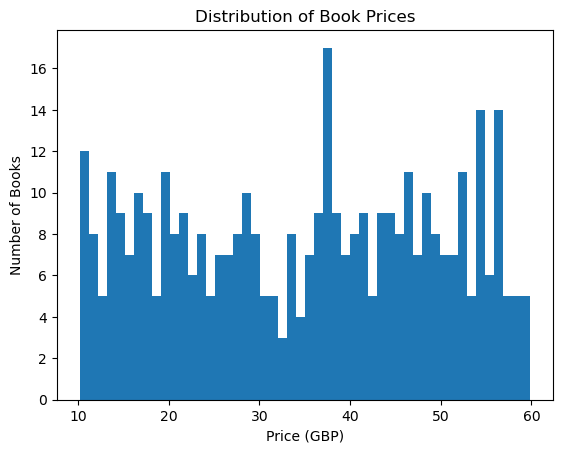

In [64]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['price_gbp'], bins=50)
plt.title("Distribution of Book Prices")
plt.xlabel("Price (GBP)")
plt.ylabel("Number of Books")
plt.show()

- Most books are priced between £20 and £50, with very few extreme prices.

##### 2.What is the quality distribution of books(RATING DISTRIBUTION)
- Shows customer sentiment
- Simple categorical analysis
- Clean insight

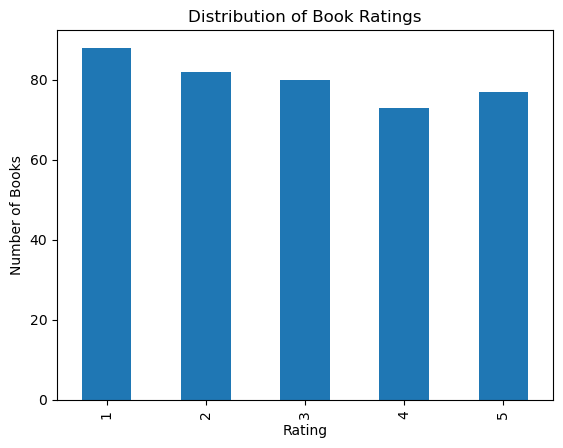

In [55]:
plt.figure()
df['rating_numeric'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()

- Most books are rated 3 and 4 stars, indicating generally positive quality

##### 3.Do higher-rated books cost more(AVERAGE PRICE BY RATING)
- Business relationship analysis

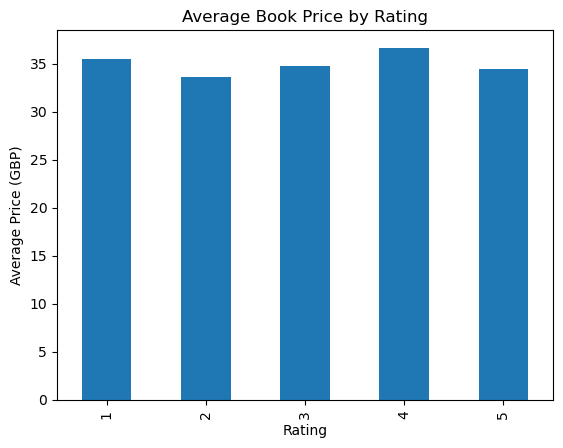

In [56]:
plt.figure()
df.groupby('rating_numeric')['price_gbp'].mean().plot(kind='bar')
plt.title("Average Book Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price (GBP)")
plt.show()

- Higher-rated books tend to have slightly higher average prices, suggesting perceived quality may influence pricing

##### 4.Is price consistent within the same rating? (PRICE VARIATION BY RATING)

<Figure size 640x480 with 0 Axes>

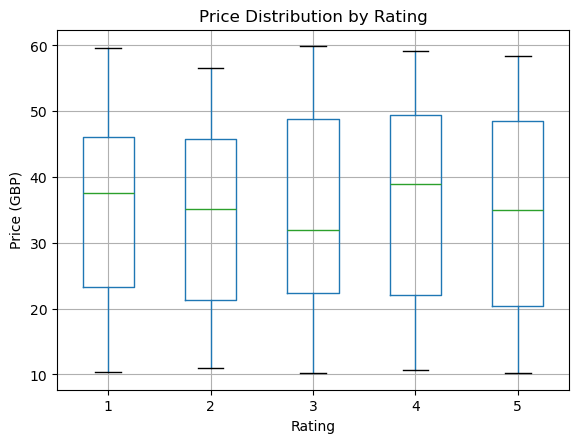

In [58]:
plt.figure()
df.boxplot(column='price_gbp', by='rating_numeric')
plt.title("Price Distribution by Rating")
plt.suptitle("")  # removes default subtitle
plt.xlabel("Rating")
plt.ylabel("Price (GBP)")
plt.show()

- Even within the same rating, prices vary significantly, showing rating alone does not fully determine price.

Summary :
- I scraped 400+ books using Python and BeautifulSoup, cleaned the data, and performed EDA.
I analyzed price distribution, rating trends, and the relationship between ratings and pricing.
The analysis shows most books are mid-priced, ratings are generally positive, and higher-rated books tend to be slightly more expensive, though price variation exists within ratings

In [ ]:
df.to_excel("Books_to_scrape_analysis.xlsx", index=False)

- I scraped and analyzed data in Python and exported the final dataset to Excel for sharing